In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=101)

In [8]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [9]:
rf_model = RandomForestClassifier()

In [10]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
base_pred = rf_model.predict(X_test)

## Evaluation

In [12]:
y_pred = rf_model.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.96

In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  2,  0],
       [ 0, 11,  0],
       [ 0,  0, 15]], dtype=int64)

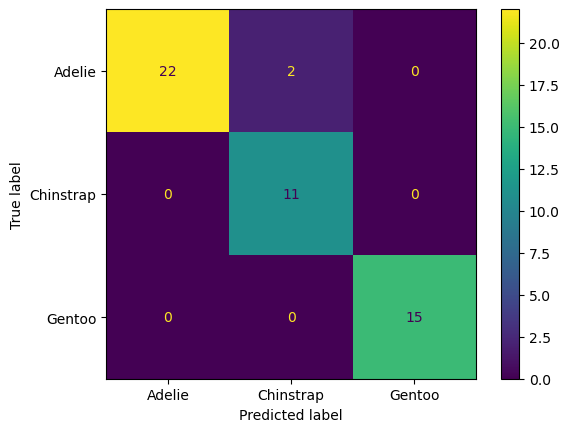

In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_model.classes_).plot()

In [16]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96        24
   Chinstrap       0.85      1.00      0.92        11
      Gentoo       1.00      1.00      1.00        15

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



In [17]:
rf_model.feature_importances_

array([0.36478336, 0.15214979, 0.22580025, 0.11545045, 0.11829451,
       0.01729365, 0.00622799])

In [18]:
df_feature_importance = pd.DataFrame(index=X.columns,data=rf_model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.364783
flipper_length_mm,0.225800
bill_depth_mm,0.152150
island_Dream,0.118295
body_mass_g,0.115450
island_Torgersen,0.017294
sex_Male,0.006228


## Grid Search

In [19]:
rf_model = RandomForestClassifier()

In [20]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]

parametros = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,}

In [21]:
grid_model = GridSearchCV(rf_model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [22]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='accuracy')

In [23]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [24]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [25]:
metrics.accuracy_score(y_test,y_pred)

0.96

In [26]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  2,  0],
       [ 0, 11,  0],
       [ 0,  0, 15]], dtype=int64)

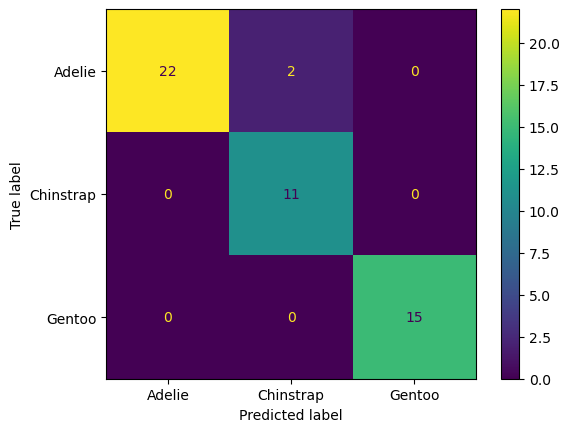

In [27]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [28]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96        24
   Chinstrap       0.85      1.00      0.92        11
      Gentoo       1.00      1.00      1.00        15

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



In [29]:
grid_model.best_estimator_.feature_importances_

array([0.34077678, 0.11624854, 0.30399551, 0.10117199, 0.11714419,
       0.01289384, 0.00776915])

In [30]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.340777
flipper_length_mm,0.303996
island_Dream,0.117144
bill_depth_mm,0.116249
body_mass_g,0.101172
island_Torgersen,0.012894
sex_Male,0.007769


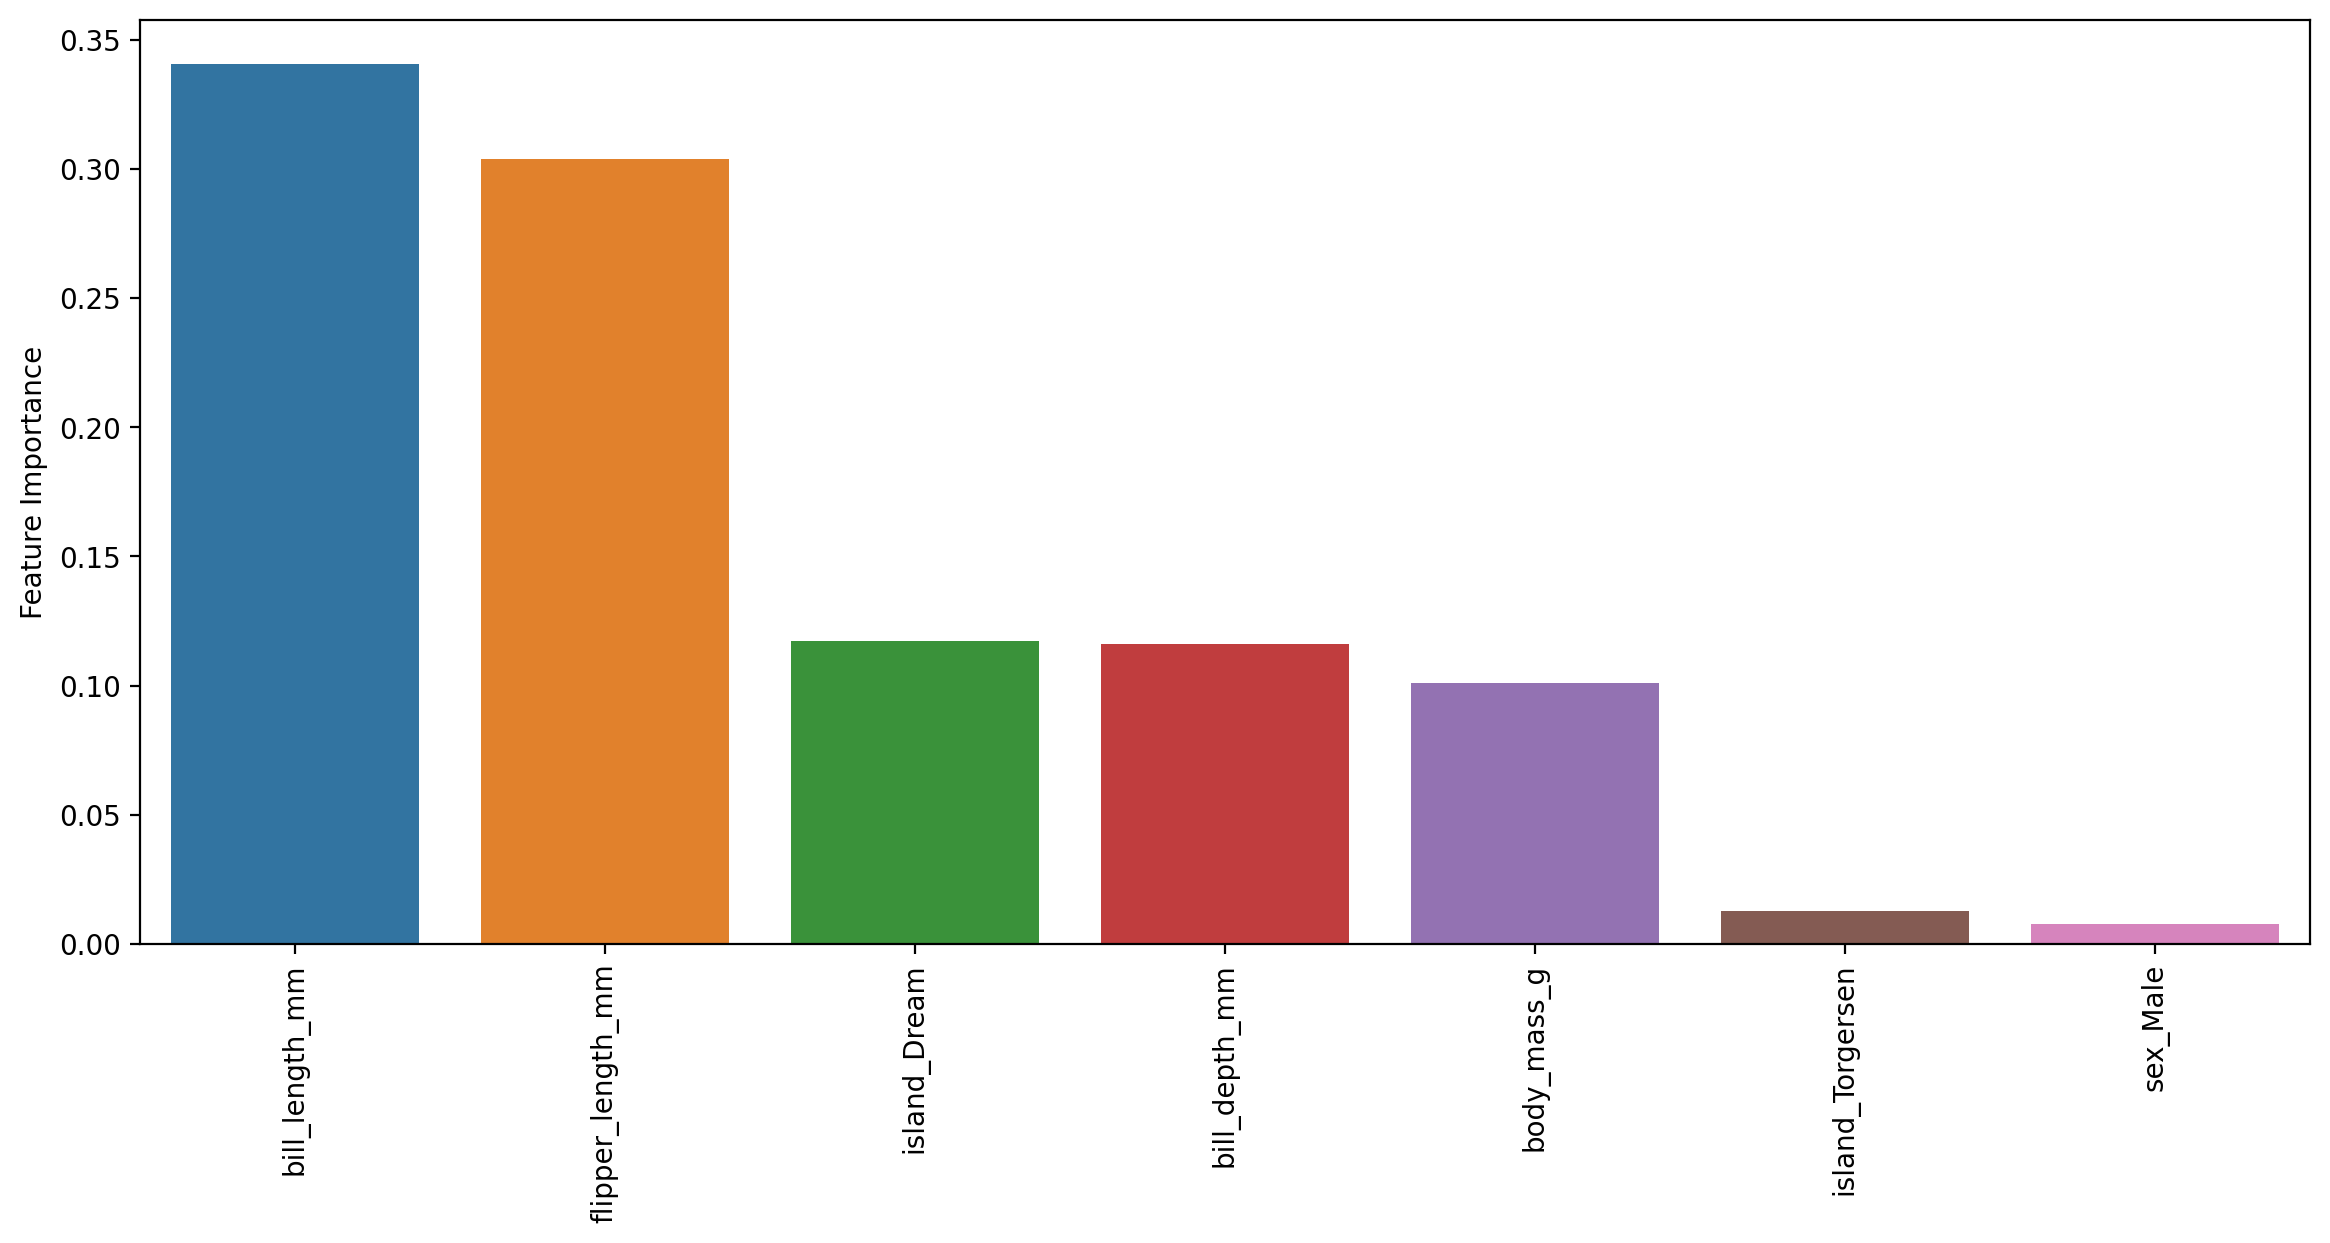

In [31]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Elbow

In [32]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

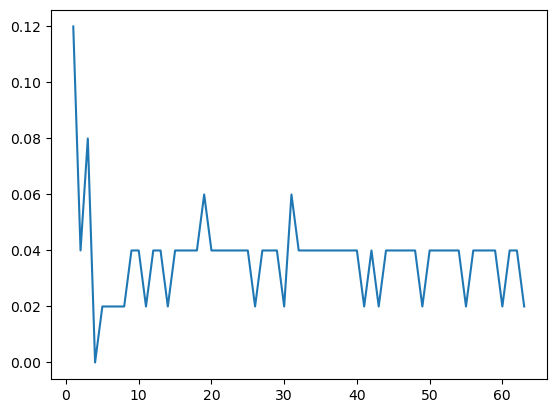

In [33]:
plt.plot(range(1,64),errors)

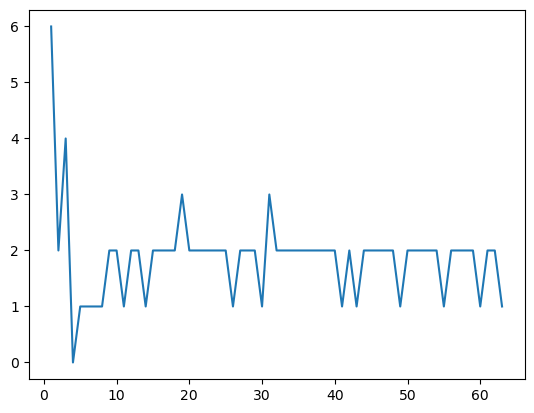

In [34]:
plt.plot(range(1,64),misclassifications)